# Importing libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


# loading the dataset and viewing it

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data sets/weatherAUS.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [ ]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [ ]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

# label encode the categorical data

In [ ]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the categorical features
df['Location'] = le.fit_transform(df['Location'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.drop('Date', axis=1, inplace=True)

# dealing with nulls

In [ ]:
df = df.dropna(subset=['MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed9am',
                                 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                                 'Temp9am', 'Temp3pm', 'RainToday'])
df.reindex()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135643 entries, 0 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       135643 non-null  int64  
 1   MinTemp        135643 non-null  float64
 2   MaxTemp        135643 non-null  float64
 3   Rainfall       135643 non-null  float64
 4   Evaporation    78834 non-null   float64
 5   Sunshine       73012 non-null   float64
 6   WindGustDir    135643 non-null  int64  
 7   WindGustSpeed  129246 non-null  float64
 8   WindDir9am     135643 non-null  int64  
 9   WindDir3pm     135643 non-null  int64  
 10  WindSpeed9am   135643 non-null  float64
 11  WindSpeed3pm   135643 non-null  float64
 12  Humidity9am    135643 non-null  float64
 13  Humidity3pm    135643 non-null  float64
 14  Pressure9am    124016 non-null  float64
 15  Pressure3pm    124081 non-null  float64
 16  Cloud9am       85104 non-null   float64
 17  Cloud3pm       83717 non-null   fl

In [ ]:
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mean())
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135643 entries, 0 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       135643 non-null  int64  
 1   MinTemp        135643 non-null  float64
 2   MaxTemp        135643 non-null  float64
 3   Rainfall       135643 non-null  float64
 4   Evaporation    135643 non-null  float64
 5   Sunshine       135643 non-null  float64
 6   WindGustDir    135643 non-null  int64  
 7   WindGustSpeed  135643 non-null  float64
 8   WindDir9am     135643 non-null  int64  
 9   WindDir3pm     135643 non-null  int64  
 10  WindSpeed9am   135643 non-null  float64
 11  WindSpeed3pm   135643 non-null  float64
 12  Humidity9am    135643 non-null  float64
 13  Humidity3pm    135643 non-null  float64
 14  Pressure9am    135643 non-null  float64
 15  Pressure3pm    135643 non-null  float64
 16  Cloud9am       135643 non-null  float64
 17  Cloud3pm       135643 non-null  fl

# dealing with outliers

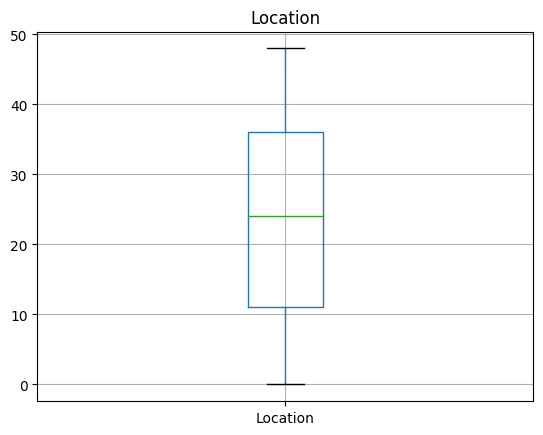

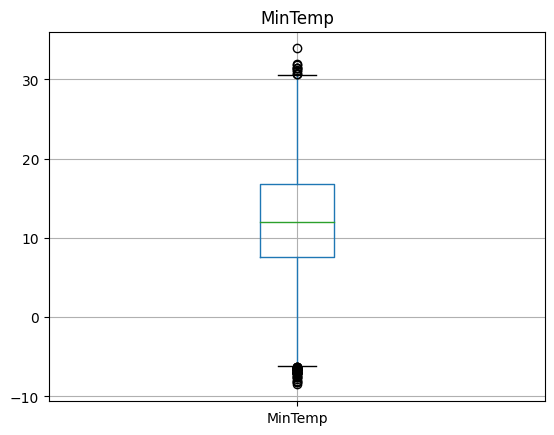

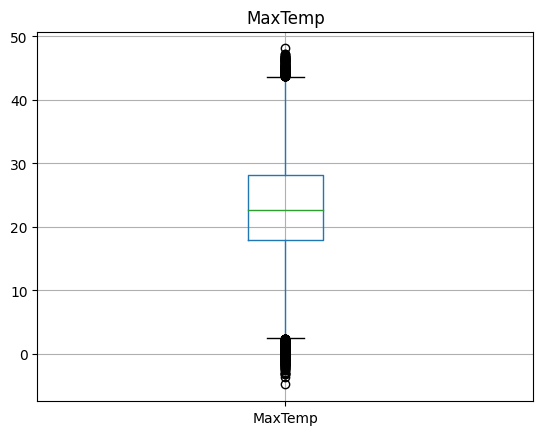

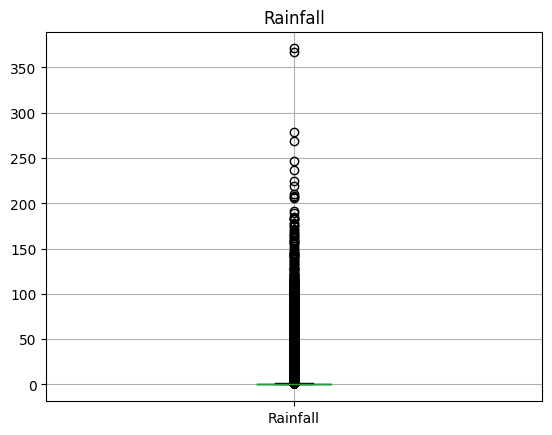

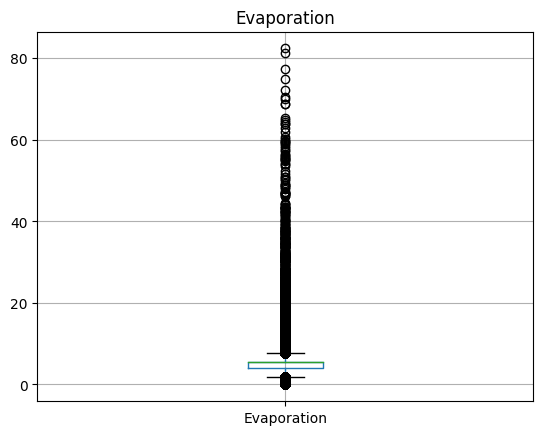

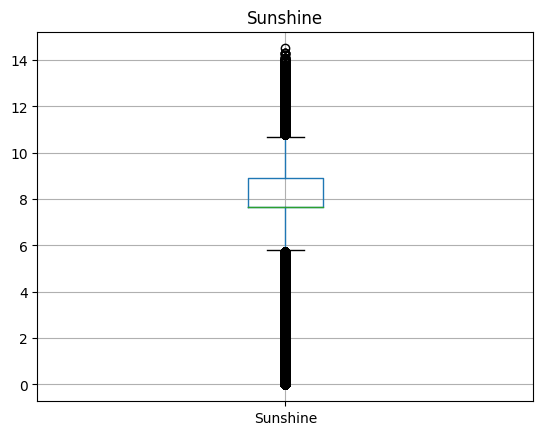

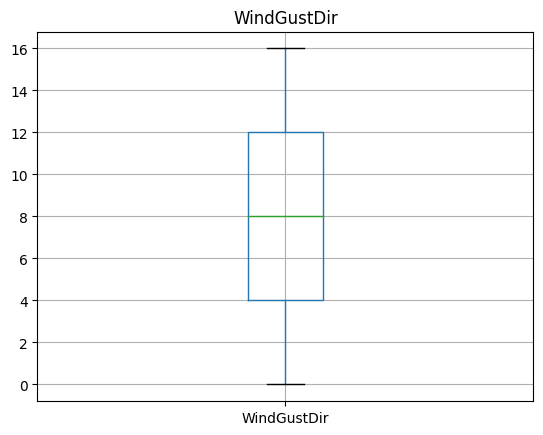

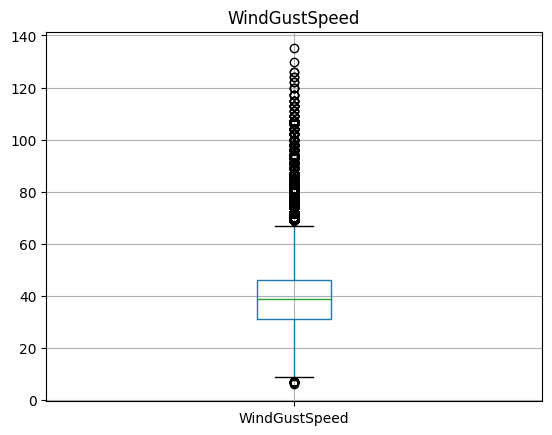

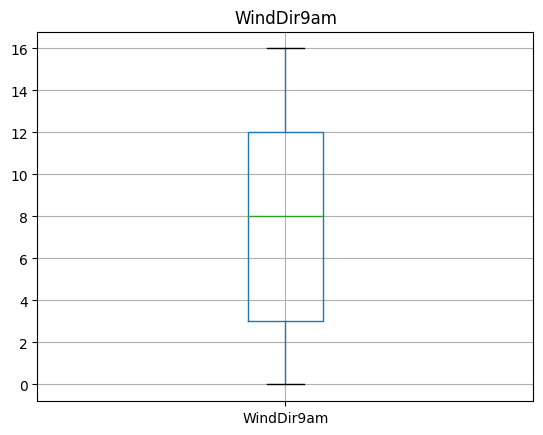

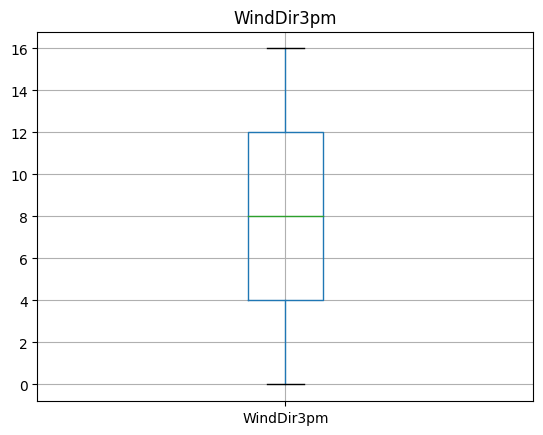

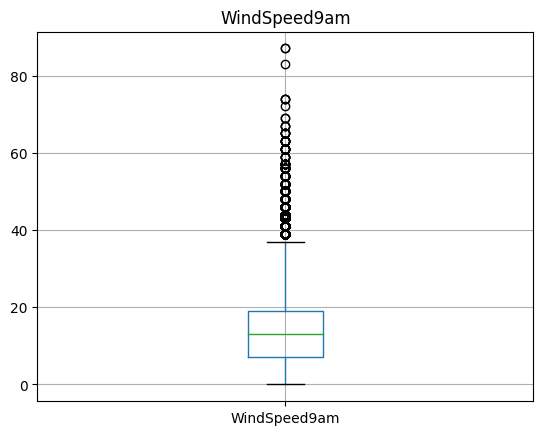

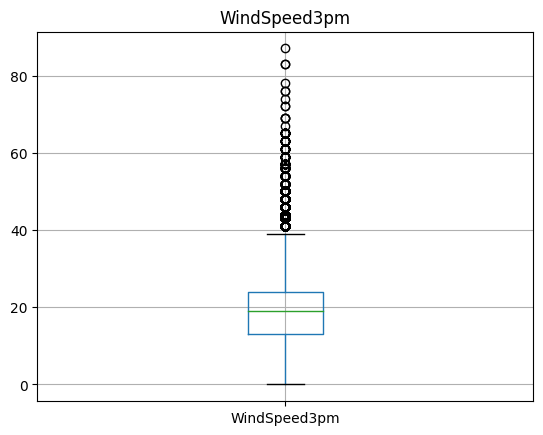

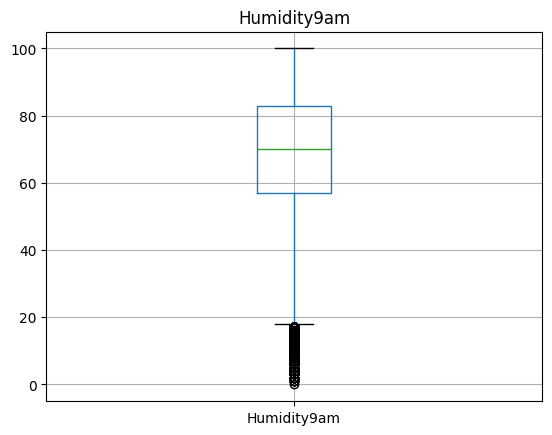

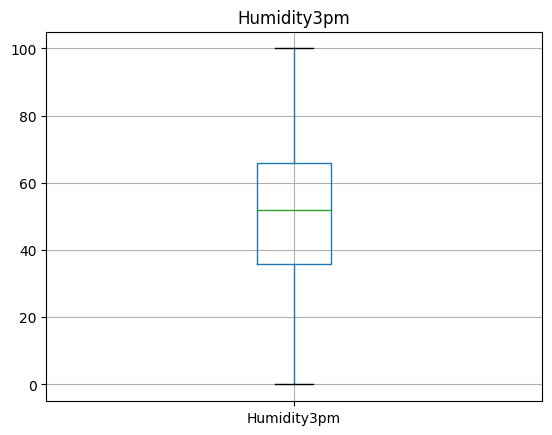

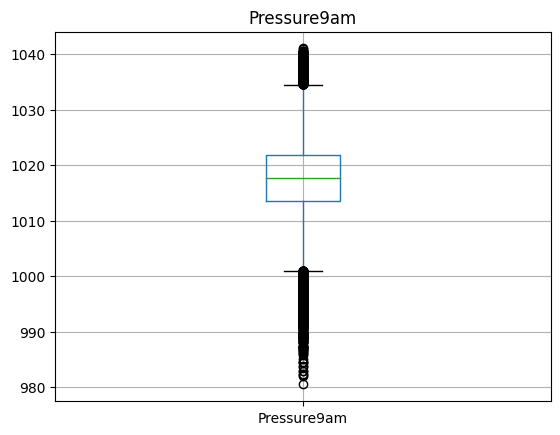

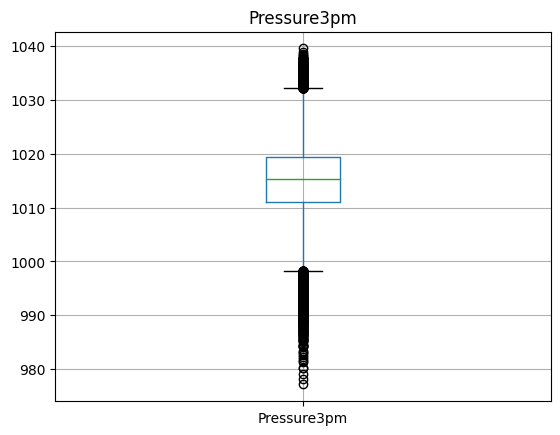

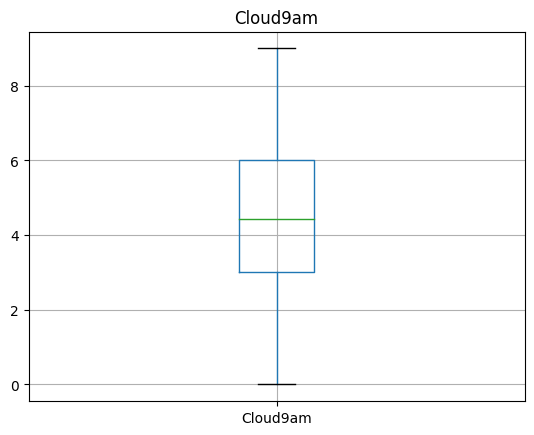

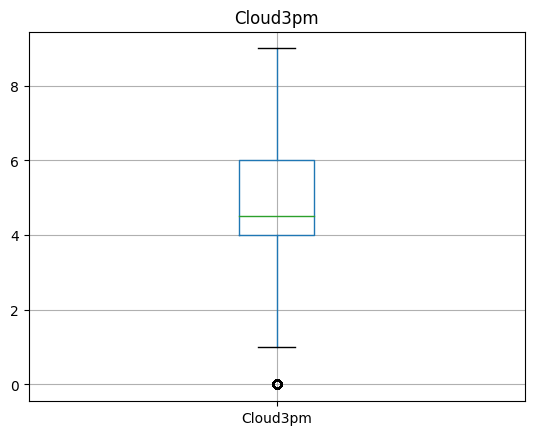

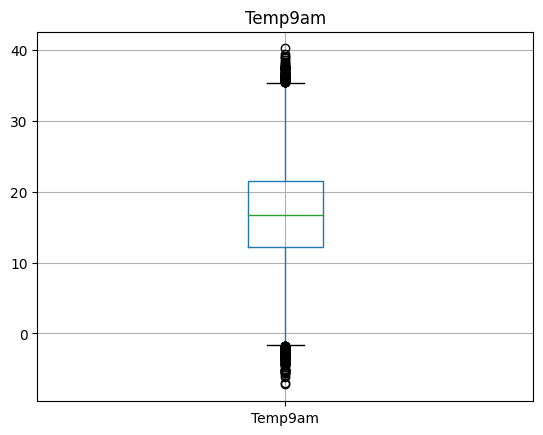

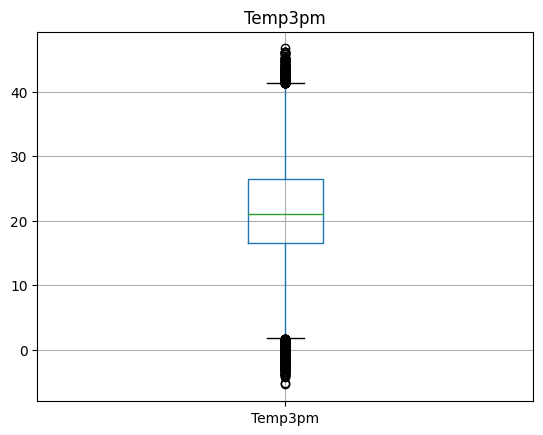

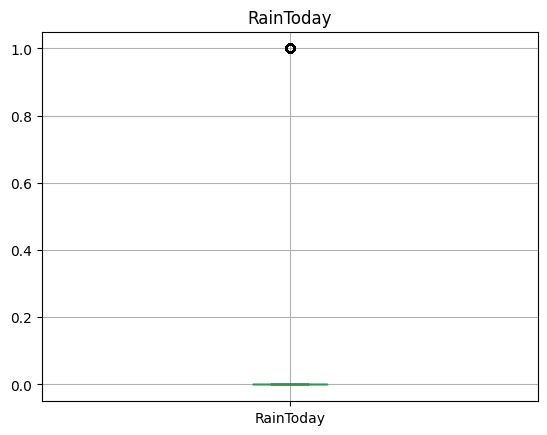

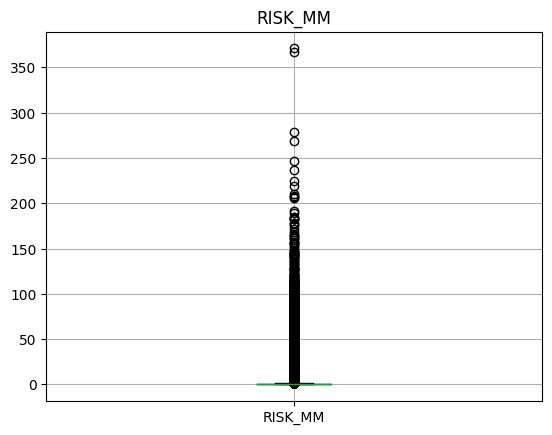

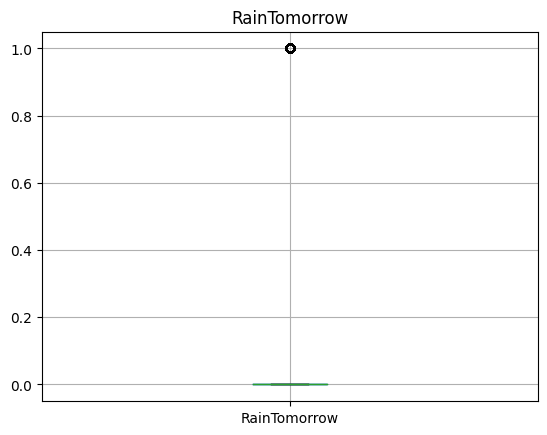

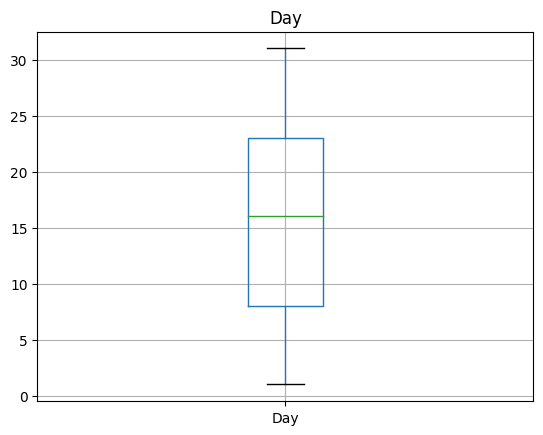

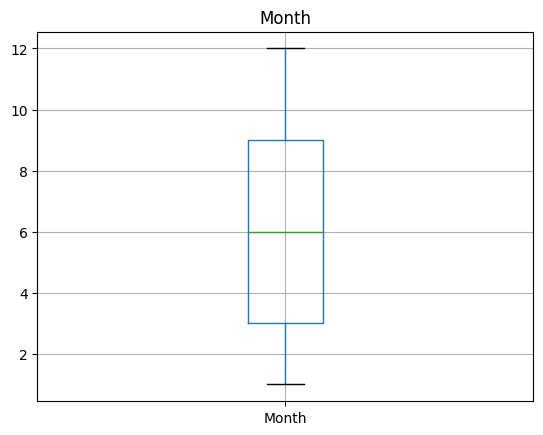

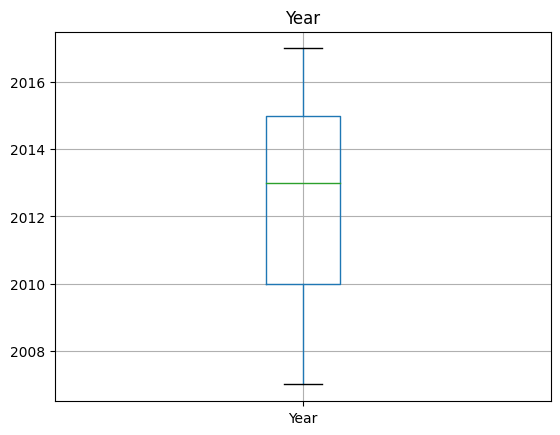

In [ ]:
for column in df.columns:
    plt.figure()  # Create a new figure for each boxplot
    df.boxplot([column])
    plt.title(column)
    plt.show()

In [ ]:
df = df[(df['MinTemp']<=30) & (df['MinTemp']>=-8)]
df = df[(df['MaxTemp']<=43) & (df['MaxTemp']>=3)]
df = df[df['Rainfall']<=150]
df = df[df['Evaporation']<=20]
df = df[(df['WindGustSpeed']<=70) & (df['WindGustSpeed']>=10)]
df = df[df['WindSpeed9am']<=40]
df = df[df['WindSpeed3pm']<=40]
df = df[df['Humidity9am']>=18]
df = df[(df['Pressure9am']<=1033) & (df['Pressure9am']>=1000)]
df = df[(df['Pressure3pm']<=1033) & (df['Pressure3pm']>=998)]
df = df[df['Cloud3pm'] >=1]
df = df[(df['Temp9am']<=35) & (df['Temp9am']>=-2)]
df = df[(df['Temp3pm']<=42) & (df['Temp3pm']>=2)]
df = df[df['RISK_MM'] <=150]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120665 entries, 0 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       120665 non-null  int64  
 1   MinTemp        120665 non-null  float64
 2   MaxTemp        120665 non-null  float64
 3   Rainfall       120665 non-null  float64
 4   Evaporation    120665 non-null  float64
 5   Sunshine       120665 non-null  float64
 6   WindGustDir    120665 non-null  int64  
 7   WindGustSpeed  120665 non-null  float64
 8   WindDir9am     120665 non-null  int64  
 9   WindDir3pm     120665 non-null  int64  
 10  WindSpeed9am   120665 non-null  float64
 11  WindSpeed3pm   120665 non-null  float64
 12  Humidity9am    120665 non-null  float64
 13  Humidity3pm    120665 non-null  float64
 14  Pressure9am    120665 non-null  float64
 15  Pressure3pm    120665 non-null  float64
 16  Cloud9am       120665 non-null  float64
 17  Cloud3pm       120665 non-null  fl

# undersampling

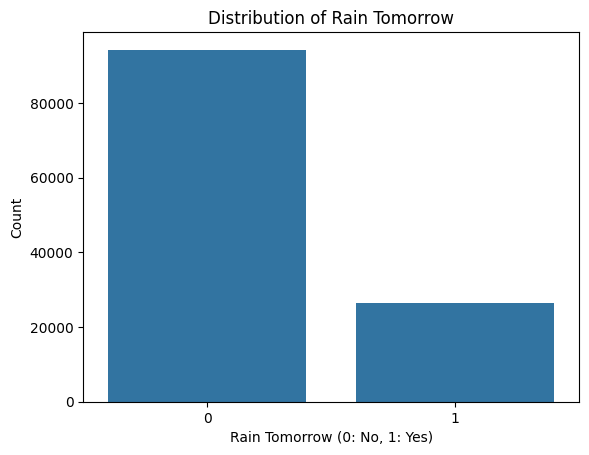

In [ ]:
# Visualize the distribution of 'RainTomorrow'
sns.countplot(x='RainTomorrow', data=df)
plt.title('Distribution of Rain Tomorrow')
plt.xlabel('Rain Tomorrow (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

In [ ]:
# Assuming 'RainTomorrow' is your target variable
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resample the data
X_resampled, y_resampled = rus.fit_resample(X, y)

# Check the new class distribution
print(y_resampled.value_counts())

RainTomorrow
0    26355
1    26355
Name: count, dtype: int64


# splitting the data to test & train

In [ ]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Applying KNN classification model to the data

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[4383,  864],
       [1231, 4064]])

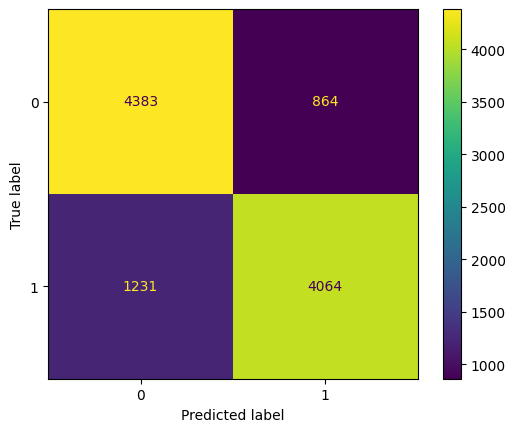

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      5247
           1       0.82      0.77      0.80      5295

    accuracy                           0.80     10542
   macro avg       0.80      0.80      0.80     10542
weighted avg       0.80      0.80      0.80     10542

